In [1]:
import math 
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import time
import scipy
from scipy.io import wavfile
import pywt
from scipy.fftpack import fft,ifft,dct,idct

In [2]:
rate, x = wavfile.read('audio.wav')
len(x)

91392

In [3]:
No_of_zeros=[]
for i in range(327):
    No_of_zeros.append(100*i)


In [4]:
Sig=[]
for i in range(32768):
    Sig.append(x[i])

#### Generalised error function

In [5]:
def Error(x,y):
    x=np.array(x)
    y=np.array(y)
    error=np.mean(abs(x-y)**2)
    return error

### Discrete Cosine Tranform

In [6]:
def X_DCT(X,k):
    Xnew=[]
    N=len(X)
    for i in range(N):
        if i<=(N-1-k):
            Xnew.append(X[i])
        else:
            Xnew.append(0)
    return Xnew

In [7]:
C=dct(Sig)
E_DCT=[]
for i in range(327):
    X_DCt=X_DCT(C,No_of_zeros[i])
    X_DCt=X_DCT(C,No_of_zeros[i])
    x=idct(X_DCt)/(2*rate)
    k=Error(Sig,x)
    E_DCT.append(k)

### Discrete Fourier Transform

In [8]:
def X_DFT(X,k):
    Xnew=[]
    N=len(list(X))
    for i in range(N):
        if i<=int((N-1-k)/2):
            Xnew.append(X[i])
        elif i>=int((N+1-k)/2) and i<=int((N-1+k)/2):
            Xnew.append(0)
        elif i>=int((N+1+k)/2) and i<=N-1:
            Xnew.append(X[i])
    return Xnew

In [9]:
D=fft(Sig)
E_DFT=[]
for i in range(327):
    X_DFt=X_DFT(D,No_of_zeros[i])
    x=ifft(X_DFt)
    k=Error(Sig,x)
    E_DFT.append(k)

### Haar  Tranform

In [10]:
def haar(x):
    out = []
    (ca, cd) = pywt.dwt(x,'haar')
    out = list(cd)+out
    while len(ca)!=1:
        (ca, cd) = pywt.dwt(ca,'haar')
        out = list(cd)+out
    out = list(ca)+out
    return out

In [11]:
def ihaar(x):
    N = len(x)
    i = 0
    x[:2] = pywt.idwt([x[0]], [x[1]],'haar')
    i = 2
    while 2*i<N+1:
        try:
            x[:2*i] = pywt.idwt(x[:i],x[i:2*i],'haar')
        except:
            print(i)
            return
        i = 2*i
    return x

In [12]:
def X_Haar(X,k):
    N=len(list(X))
    Xnew=[]
    for i in range(N):
        if i<=(N-1-k):
            Xnew.append(X[i])
        else:
            Xnew.append(0)
    return Xnew

In [13]:
H=haar(Sig)
E_Haar=[]
for i in range(327):
    X_Haar=X_DCT(H,No_of_zeros[i])
    x=ihaar(X_Haar)
    k=Error(Sig,x)
    E_Haar.append(k)

In [14]:
T=[]
for i in range(327):
    T.append((32768-(i*100))/32768)
T.reverse()

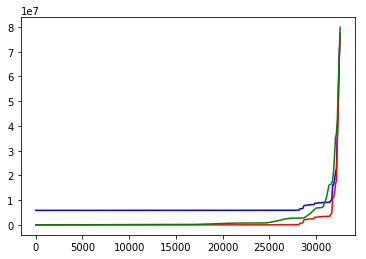

In [15]:
plt.plot(No_of_zeros,E_DCT,'-b')
plt.plot(No_of_zeros,E_DFT,'-r')
plt.plot(No_of_zeros,E_Haar,'-g')